# **Preliminary: Install and Import Packages**

In [4]:
!pip install kaggle
import os


os.environ['KAGGLE_USERNAME'] = 'zn2222'
os.environ['KAGGLE_KEY'] = '5cb10e85beb74201628848dbe07b4874'


# **Query Data**

Query Data from the Source:
https://www.kaggle.com/competitions/llm-detect-ai-generated-text/data

In [5]:
!kaggle competitions download -c llm-detect-ai-generated-text
!unzip llm-detect-ai-generated-text.zip


llm-detect-ai-generated-text.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  llm-detect-ai-generated-text.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import pandas as pd

df = pd.read_csv('train_essays.csv')
df


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


# **Inspect Data**

In [7]:
df.head(10)

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
5,00da8c32,1,The electrol college system is an unfair syste...,0
6,011dc2bc,1,"Dear state senator, It is the utmost respect t...",0
7,01448434,0,"Fellow citizens, cars have become a major role...",0
8,01c6e176,1,"""It's official: The electoral college is unfai...",0
9,0202ddf9,1,The Electoral College has been kept for centur...,0


In [8]:
df.tail()

,id,prompt_id,text,generated
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0
1377,ffe1ca0d,0,Cars have been around since the 1800's and hav...,0


In [9]:
df.dtypes

id           object
prompt_id     int64
text         object
generated     int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [11]:
train = df
train['prompt_id'].value_counts()


0    708
1    670
Name: prompt_id, dtype: int64

<ipython-input-12-332bf1a136af>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train, x="prompt_id", palette='Set3')


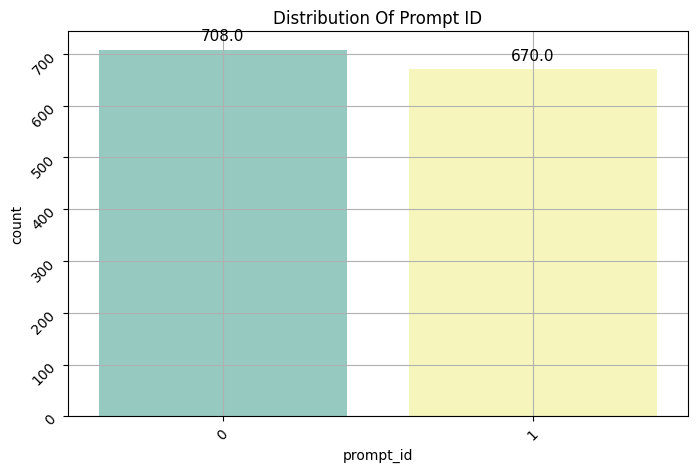

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
ax = sns.countplot(data=train, x="prompt_id", palette='Set3')

# Get the counts for each category
counts = train['prompt_id'].value_counts()

# Add labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
                textcoords='offset points')

ax.set_title("Distribution Of Prompt ID")
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [13]:
train['generated'].value_counts()


0    1375
1       3
Name: generated, dtype: int64

<ipython-input-14-317769c2cb41>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=train,x="generated",palette='Set3')


AttributeError: 'NoneType' object has no attribute 'get_bbox'

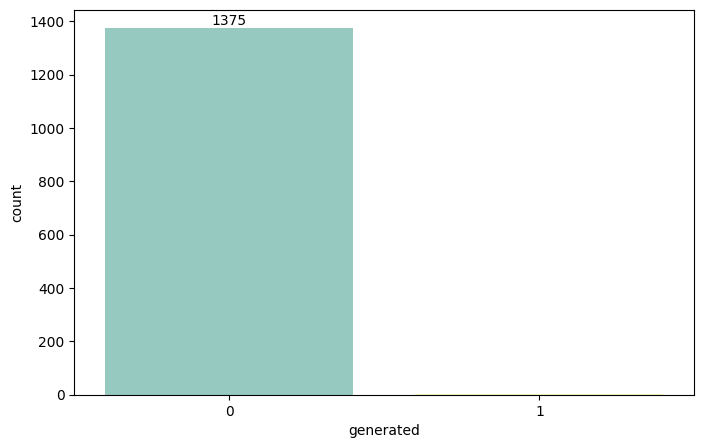

In [14]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=train,x="generated",palette='Set3')
abs_values = train['generated'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title("Distribution Of Generated")
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [ ]:
!kaggle datasets download -d thedrcat/daigt-v2-train-dataset
!unzip daigt-v2-train-dataset


In [15]:
new_data=pd.read_csv('train_v2_drcat_02.csv')
new_data

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False
...,...,...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44864,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44865,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True
44866,"Dear Senator,\n\nI am writing to you today to ...",1,Does the electoral college work?,kingki19_palm,True


In [16]:
new_data.label.value_counts()


0    27371
1    17497
Name: label, dtype: int64

In [17]:
new_data.prompt_name.value_counts()


Distance learning                        5554
Seeking multiple opinions                5176
Car-free cities                          4717
Does the electoral college work?         4434
Facial action coding system              3084
Mandatory extracurricular activities     3077
Summer projects                          2701
Driverless cars                          2250
Exploring Venus                          2176
Cell phones at school                    2119
Grades for extracurricular activities    2116
Community service                        2092
"A Cowboy Who Rode the Waves"            1896
The Face on Mars                         1893
Phones and driving                       1583
Name: prompt_name, dtype: int64

In [18]:
train=pd.read_csv('train_essays.csv')
test=pd.read_csv('test_essays.csv')
train_prompts=pd.read_csv('train_prompts.csv')


In [19]:
new_=new_data.iloc[:, 0:2][new_data['prompt_name'].isin(train_prompts['prompt_name'].values)]
new_

,text,label
1168,Cars have been around for awhile and they have...,0
1169,Have you ever thought what it would be like no...,0
1170,What you are about to read is going to give yo...,0
1171,cars have many flaws nd and in this day and ag...,0
1172,There are many advantages of limiting car usag...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


In [20]:
t=train.iloc[:,2:]
t.columns=['text','label']
train_data=pd.concat([new_,t])
train_data=train_data.reset_index().iloc[:,1:]
train_data.head()

,text,label
0,Cars have been around for awhile and they have...,0
1,Have you ever thought what it would be like no...,0
2,What you are about to read is going to give yo...,0
3,cars have many flaws nd and in this day and ag...,0
4,There are many advantages of limiting car usag...,0


In [21]:
train_data.label.value_counts()


0    6755
1    3774
Name: label, dtype: int64

<ipython-input-22-41bcf3afe5a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=train_data,x="label",palette='Set3')


AttributeError: 'NoneType' object has no attribute 'get_bbox'

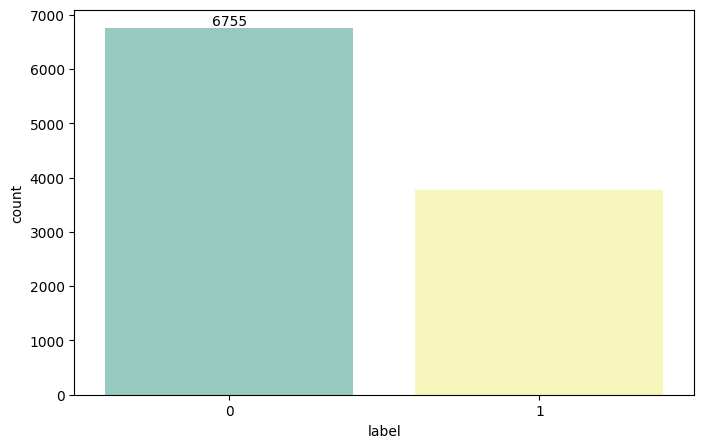

In [22]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=train_data,x="label",palette='Set3')
abs_values = train_data['label'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_title("Distribution Of Label")
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [23]:

import tensorflow as tf
from sklearn.model_selection import train_test_split
import re
!pip install tensorflow-text
import tensorflow_text as tf_text
from tensorflow.keras.layers import TextVectorization, Embedding, Bidirectional, LSTM, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras import Model, Input
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE



In [24]:
def Clean(text):
    text = tf_text.normalize_utf8(text, 'NFKD')
    text = tf.strings.lower(text)
    text = tf.strings.regex_replace(text, '[^ a-z.?!,¿]', '')
    text = tf.strings.regex_replace(text, '[.?!,¿]', r' \0 ')
    text = tf.strings.strip(text)
    text = tf.strings.regex_replace(text, '\.\.\.', ' ')
    text = tf.strings.join(['',text, ''], separator=' ')
    return text
def clean_text(text):
    # Remove Twitter handles starting with '@'
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert multiple whitespace characters to a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert the text to lowercase
    text = text.lower()
    return text

In [25]:
train_data['text'][0]


'Cars have been around for awhile and they have had a major impact on society. Many people believe that there is no problem with the frequency of cars being driven. But, there are many advantages to less car use such as improving our cities and suburbs, improving safety, and decreasing pollution.\n\nMany have tried to make cities a little more dense and better for walking but nothing has seemed to work; therefore, they have moved on to suburbs. Now, people are trying to make suburbs better for getting around while walking instead of driving. By doing so, places such as shops will be made closer and more convienent which allows people to be able to consider walking as a better option. By having these suburbs, and soon hopefully cities, reduce the amount of cars used, the people living in these areas will be able to accomplish more in a healthier and safer way.\n\nSafety has been an issue in almost all areas due to a variety of reasons; one being cars. People pass by "Drive Safely" signs

In [26]:
Clean(train_data['text'][0])


<tf.Tensor: shape=(), dtype=string, numpy=b' cars have been around for awhile and they have had a major impact on society .  many people believe that there is no problem with the frequency of cars being driven .  but ,  there are many advantages to less car use such as improving our cities and suburbs ,  improving safety ,  and decreasing pollution . many have tried to make cities a little more dense and better for walking but nothing has seemed to work therefore ,  they have moved on to suburbs .  now ,  people are trying to make suburbs better for getting around while walking instead of driving .  by doing so ,  places such as shops will be made closer and more convienent which allows people to be able to consider walking as a better option .  by having these suburbs ,  and soon hopefully cities ,  reduce the amount of cars used ,  the people living in these areas will be able to accomplish more in a healthier and safer way . safety has been an issue in almost all areas due to a vari

In [27]:
clean_text(train_data['text'][0])


'cars have been around for awhile and they have had a major impact on society many people believe that there is no problem with the frequency of cars being driven but there are many advantages to less car use such as improving our cities and suburbs improving safety and decreasing pollution many have tried to make cities a little more dense and better for walking but nothing has seemed to work therefore they have moved on to suburbs now people are trying to make suburbs better for getting around while walking instead of driving by doing so places such as shops will be made closer and more convienent which allows people to be able to consider walking as a better option by having these suburbs and soon hopefully cities reduce the amount of cars used the people living in these areas will be able to accomplish more in a healthier and safer way safety has been an issue in almost all areas due to a variety of reasons one being cars people pass by drive safely signs or memorials on the side o

In [28]:
max_features = 75000
embedding_dim = 64
sequence_length = 512*2
vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=Clean ,
    max_tokens=max_features,
    ngrams = (3,5),
    output_mode="int",
    output_sequence_length=sequence_length,
    pad_to_max_tokens=True
)
vectorize_layer.adapt(train_data['text'])
Text = vectorize_layer(train_data['text']).numpy()
Text

array([[ 1138, 19101,  5729, ...,     1,     1,     1],
       [ 3796, 10859,     1, ...,     0,     0,     0],
       [28184,     1, 53697, ...,     1,     1,     1],
       ...,
       [    1, 31053,     1, ...,     1,     1,     1],
       [24714,  8587,     1, ...,     1,     1,     1],
       [ 1138, 19101, 21592, ...,     0,     0,     0]])

In [29]:
sm = SMOTE(random_state=44)
Text,labels= sm.fit_resample(Text,train_data['label'])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(Text,labels, test_size=0.2, random_state=44, shuffle =True,stratify=labels)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (10808, 1024)
X_test shape is  (2702, 1024)
y_train shape is  (10808,)
y_test shape is  (2702,)


In [31]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [32]:
inputs = Input(shape=(sequence_length,), dtype="int64")
x = Embedding(max_features, embedding_dim)(inputs)
x = Bidirectional(LSTM(32, return_sequences=True))(x)
transformer_block = TransformerBlock(embedding_dim, 2, 32)
x = transformer_block(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation="sigmoid", name="predictions")(x)

model = Model(inputs=inputs, outputs=predictions)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 embedding (Embedding)       (None, 1024, 64)          4800000   
                                                                 
 bidirectional (Bidirection  (None, 1024, 64)          24832     
 al)                                                             
                                                                 
 transformer_block (Transfo  (None, 1024, 64)          37664     
 rmerBlock)                                                      
                                                                 
 conv1d (Conv1D)             (None, 340, 128)          57472     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0     

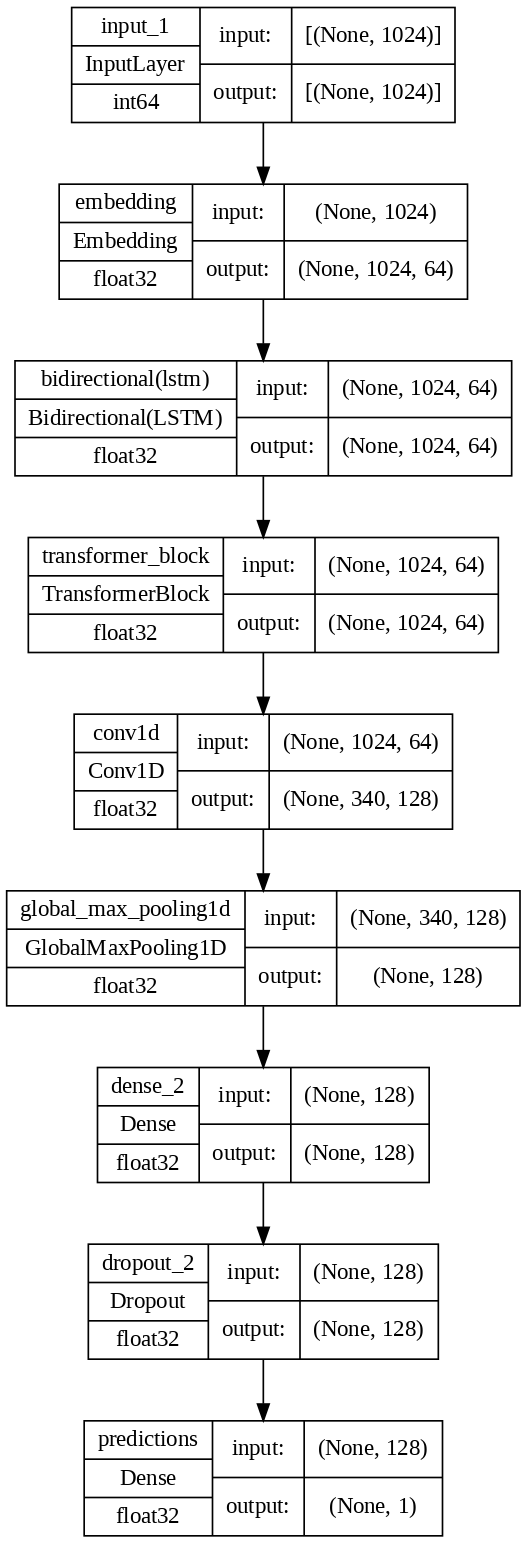

In [33]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True,
                          show_layer_names=True,show_dtype=True,dpi=120)

In [34]:
checkpoint_cb =ModelCheckpoint("model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=3, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train,y_train, epochs=5, validation_split=.1, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/5
304/304 [==============================] - ETA: 0s - loss: 0.1254 - accuracy: 0.9526

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/304 [==============================] - 1303s 4s/step - loss: 0.1254 - accuracy: 0.9526 - val_loss: 0.0183 - val_accuracy: 0.9935
Epoch 2/5
304/304 [==============================] - 1256s 4s/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0268 - val_accuracy: 0.9907
Epoch 3/5
304/304 [==============================] - 1259s 4s/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0500 - val_accuracy: 0.9852
Epoch 4/5
304/304 [==============================] - 1264s 4s/step - loss: 3.4725e-04 - accuracy: 0.9999 - val_loss: 0.0314 - val_accuracy: 0.9935


In [35]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.125370,0.952606,0.018264,0.993524
1,0.015715,0.994962,0.026770,0.990749
2,0.003737,0.998663,0.049976,0.985199
3,0.000347,0.999897,0.031377,0.993524


In [36]:
score, acc= model.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

85/85 [==============================] - 132s 2s/step - loss: 0.0208 - accuracy: 0.9937
Test Loss = 0.020750340074300766
Test Accuracy = 0.9937083721160889
